In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
import warnings

warnings.filterwarnings('ignore')    #suppress warnings

## Pauli Matrices
$$ {I = {\left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right]}} , {X = {\left[\begin{array}{cc} 0 & 1\\ 1 & 0 \end{array} \right]} },{ Y = {\left[\begin{array}{c} 0 & i \\ -i & 0 \end{array} \right]}} ,{ Z = {\left[\begin{array}{c} 1 & 0 \\ 0 & -1 \end{array} \right]} }$$

### X-gate
The X-gate is represented by the Pauli-X matrix:
    $${X = {\left[\begin{array}{cc} 0 & 1\\ 1 & 0 \end{array} \right]}}=|0\rangle \langle1|+|1\rangle \langle0|  $$
    
that effect a gate has on the qubit
    $${X|0\rangle = {\left[\begin{array}{cc} 0 & 1\\ 1 & 0 \end{array} \right]}{\left[\begin{array}{c} 1 \\ 0 \end{array} \right]}={\left[\begin{array}{c} 0 \\ 1 \end{array} \right]}=|1\rangle } $$  
    
 Let's do an X-gate on a $|0\rangle$ qubit    

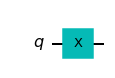

In [2]:
qc=QuantumCircuit(1)
qc.x(0)
qc.draw('mpl')        # mpl stands for the matplotlib argument

In [3]:
# Let's see the result
backend = Aer.get_backend('statevector_simulator')
out = execute(qc, backend).result().get_statevector() 
print(out) 

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


### Y-gate
$${{ Y = {\left[\begin{array}{c} 0 & i \\ -i & 0 \end{array} \right]}} = -i|0\rangle \langle1|+i|1\rangle \langle0| } $$

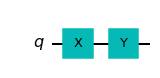

In [4]:
qc.y(0)               # Do Y-gate on qubit 0
qc.draw('mpl')        # mpl stands for the matplotlib argument

### Z-gate
$${{ Z = {\left[\begin{array}{c} 1 & 0 \\ 0 & -1 \end{array} \right]} } = |0\rangle \langle0|-|1\rangle \langle1| }$$

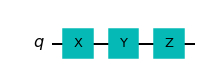

In [5]:
qc.z(0)           # Do Z-gate on qubit 0

qc.draw('mpl')

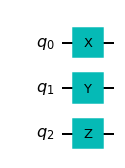

In [6]:
qc=QuantumCircuit(3)
qc.x(0)
qc.y(1)
qc.z(2)
qc.draw('mpl')        # mpl stands for the matplotlib argument

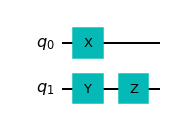

In [7]:
qc=QuantumCircuit(2)
qc.x(0)
qc.y(1)
qc.z(1)
qc.draw('mpl')        # mpl stands for the matplotlib argument

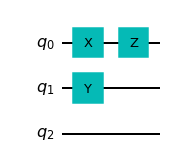

In [8]:
qc=QuantumCircuit(3)
qc.x(0)
qc.y(1)
qc.z(0)
qc.draw('mpl')        # mpl stands for the matplotlib argument

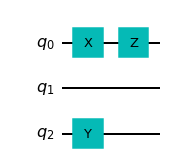

In [9]:
qc=QuantumCircuit(3)
qc.x(0)
qc.y(2)
qc.z(0)
qc.draw('mpl')        # mpl stands for the matplotlib argument

### Hadamard Gate
$$ H = \frac{1}{\sqrt 2}{{\left[\begin{array}{c} 1 & 1 \\ 1 & -1 \end{array} \right]} } $$
We can see that this performs the transformations below:
$$H|0\rangle=|+\rangle \\ H|1\rangle=|-\rangle $$

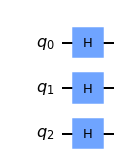

In [10]:
qc =  QuantumCircuit(3)                # create circuit with three qubit
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)

qc.draw('mpl')

### Identity Gate
$$ {I = {\left[\begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right]}} \\ I = XX $$

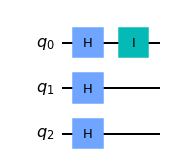

In [11]:
qc.i(0)

qc.draw('mpl')

## Multiple Qubits
The state of two qubits :
 $$\large |\psi\rangle = {a_{00}}|00\rangle + {a_{01}}|01\rangle + {a_{10}}|10\rangle + {a_{11}}|11\rangle = {\left[\begin{array}{c}  {a_{00}} \\ {a_{01}} \\ {a_{10}} \\ {a_{11}} \end{array}\right]} $$

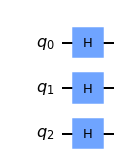

In [12]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)

qc.draw('mpl') # See the circuit:

Each qubit is in the state$|+\rangle$ , so we should see the vector:
$$ |{+++}\rangle = \frac{1}{\sqrt 8}{\left[\begin{array}{c} 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\ 1 \\1 \end{array} \right]} $$

In [13]:
backend = Aer.get_backend('statevector_simulator')
out = execute(qc,backend).result().get_statevector()
print(out)    # Let's see the result

Statevector([0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j, 0.35355339+0.j,
             0.35355339+0.j, 0.35355339+0.j],
            dims=(2, 2, 2))


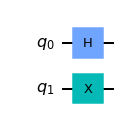

In [14]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw('mpl')

$$ X|{q_1}\rangle \otimes H|{q_0}\rangle = (X \otimes H)|{q_1}{q_0}\rangle $$

The operation looks like this:
    $$ X \otimes H = { {\left[\begin{array}{cc} 0 & 1\\ 1 & 0 \end{array} \right]} } \otimes  \frac{1}{\sqrt 2}{{\left[\begin{array}{c} 1 & 1 \\ 1 & -1 \end{array} \right]} } = \frac{1}{\sqrt 2}{{\left[\begin{array}{c} 0 & 0 & 1 & 1 \\ 0 & 0 & 1 & -1 \\ 1 & 1 & 0 & 0 \\ 1 & -1 & 0 & 0 \end{array} \right]} } $$
    
Which we can then apply to our 4D statevector $ |{q_1}{q_0}\rangle $ . You will often see the clearer notation:
 $$ X \otimes H = \left[\begin{array}{c} 0 & H \\ H & 0 \end{array} \right] $$

## C-Not Gate

Classical truth table of C-Not gate:

|Input (t,c)|Output (t,c)|
|---|---|
|00|00|
|01|11|
|10|10|
|11|01|

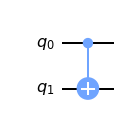

In [15]:
#create circuit with two qubit
qc = QuantumCircuit(2)
# Apply CNOT
qc.cx(0,1)

qc.draw('mpl')         # See the circuit:

### Entanglement

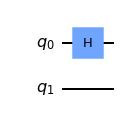

In [16]:
qc = QuantumCircuit(2)              #create two qubit circuit
# Apply H-gate to the first:
qc.h(0)
qc.draw('mpl')

In [17]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
print(final_state)        # Let's see the result:

Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))


##### Quantum System Sate is: $$ |0+\rangle = \frac{1}{\sqrt 2}{\Large(}|00\rangle + |01\rangle{\Large)} $$

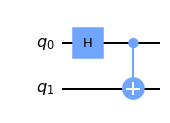

In [18]:
# Apply a CNOT:
qc.cx(0,1)
qc.draw('mpl')

In [19]:
final_state = execute(qc,backend).result().get_statevector()
print(final_state)       # Let's see the result:

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


We see we have this final state (Bell State):   $${CNOT}|0+\rangle = \frac{1}{\sqrt 2}{\Large(}|00\rangle + |11\rangle{\Large)} $$

## Bernstein-Vazirani Algorithm

A black-box function $f$ , which takes as input a string of bits $(x)$, and returns either $0$ or $1$ , $i.e.$:
$f({ x_0 , x_1 , x_2 , \ldots})\rightarrow 0$ or $1$ where $x_n$ is $0$ or $1.$

The function is guaranteed to return the bitwise product of the input with some string,$s$.

In other words, given an input $x$,$f(x)=s.x(mod 2)={x_0*s_0 + x_1*s_1 + x_2*s_2 + \ldots }$mod 2

The quantum Bernstein-Vazirani Oracle:

1. Initialise the inputs qubits to the $ {|0\rangle}^{\otimes n} $ state, and output qubit to $ |-\rangle$ .
2. Apply Hadamard gates to the input register
3. Query the oracle
4. Apply Hadamard gates to the input register
5. Measure

### Example  of Two Qubits ($ \psi_0 , \psi_1 , \psi_2 , \psi_3$):
1. The register of two qubits is initialized to zero: $|{\Large\psi}_0\rangle=|00\rangle$


2. Apply a Hadamard gate to both qubits:${{|{\Large\psi}_1\rangle}={\frac{1}{\sqrt 2}(|00\rangle} + {|01\rangle} + {|10\rangle} + {|11\rangle})}$

3. For the string $s=11$, the quantum oracle performs the operation:
## $$ |x\rangle {\xrightarrow[]{f_s}} (-1)^{x.11} |x\rangle$$
### $$ |{\Large \psi_2 }\rangle = \frac{1}{\sqrt 2}{\Large(}(-1)^{{00}.{11}}|00\rangle + (-1)^{{01}.{11}}|01\rangle + (-1)^{{10}.{11}}|10\rangle + (-1)^{{11}.{11}}|11\rangle{\Large)}$$
### $$ |{\Large \psi_2 }\rangle = \frac{1}{\sqrt 2}{\Large(}|00\rangle - |01\rangle - |10\rangle + |11\rangle{\Large)}$$

4. Apply a Hadamard gate to both qubits: $ |{\Large \psi_3} \rangle = |11\rangle $


5. Measure to find the secret string $s=11$.

In [20]:
s = 101011

#### STEP 1

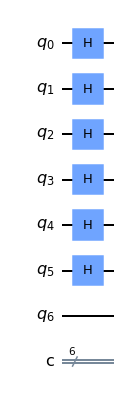

In [21]:
qc = QuantumCircuit(6+1,6)
qc.h([0,1,2,3,4,5])
qc.draw('mpl')

#### STEP 2

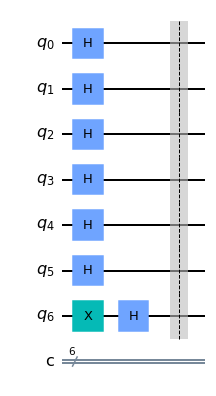

In [22]:
qc.x(6)
qc.h(6)
qc.barrier()
qc.draw('mpl')

#### STEP 3

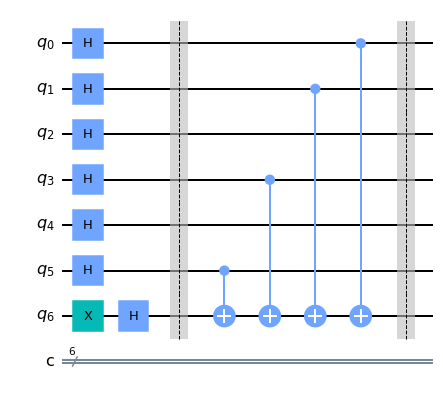

In [23]:
qc.cx(5, 6)
qc.cx(3, 6)
qc.cx(1, 6)
qc.cx(0, 6)
qc.barrier()
qc.draw('mpl')

#### STEP 4

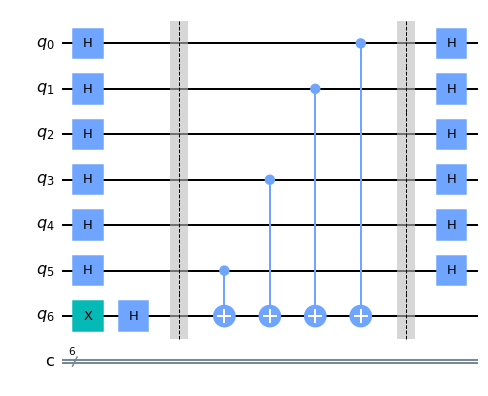

In [24]:
qc.h([0,1,2,3,4,5])
qc.draw('mpl')

#### STEP 5

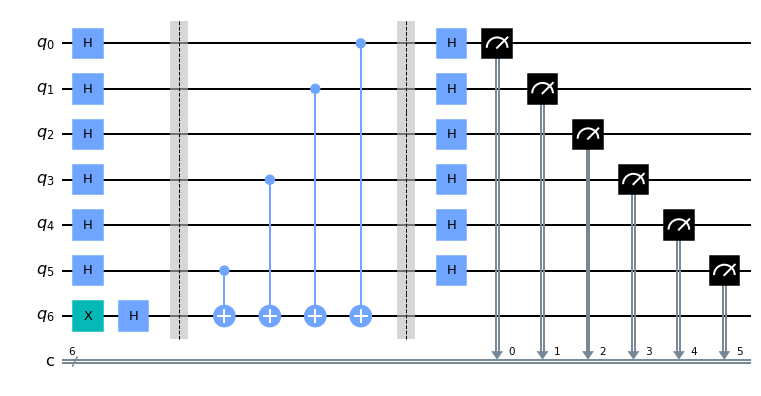

In [25]:
qc.measure([0,1,2,3,4,5], [0,1,2,3,4,5])
qc.draw('mpl')

In [26]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = simulator, shots = 1).result()
counts =result.get_counts()
print(counts)

{'101011': 1}


The result is the same as the number that we defined in the variable "s" earlier in the task!!!

### Quantum teleportation

In [27]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *
import random, time

# We will create a random qubit by directly assigning random amplitudes

a1 = random.random()*2 -1 #Uniform number in [-1,1]
a2 = random.random()*2 -1
b1 = random.random()*2 -1
b2 = random.random()*2 -1

# We need to normalize

norm = (a1**2 + a2**2 + b1**2 + b2**2)**0.5

c1 = complex(a1/norm,a2/norm) #Amplitude for |0> 
c2 = complex(b1/norm,b2/norm) #Amplitude for |1>

psi = QuantumRegister(1, name  = 'psi')  # The qubit to teleport
bell = QuantumRegister(2, name = 'bell') # The shared entangled pair 
c = ClassicalRegister(2, name  = 'c') # Two classical bits for the measures

teleport = QuantumCircuit(psi,bell,c) # We create the circuit with the two quantum registers and the classical bits
teleport.initialize([c1,c2],psi) # We set the amplitudes for Alice's quibt
teleport.barrier()

print("Alice's qubit is:")
print(c1,"|0> + ",
      c2,"|1>")

Alice's qubit is:
(-0.6070909009361398-0.08531829800011566j) |0> +  (-0.5176466102087022+0.5968277917174681j) |1>


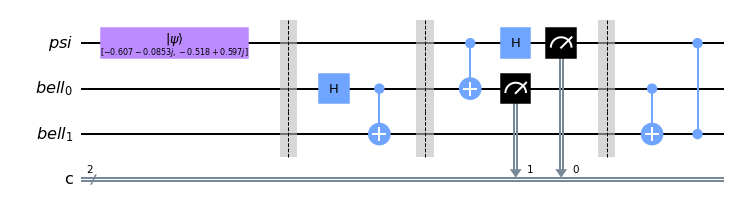

In [28]:
# Now we create the Bell pair

teleport.h(bell[0])
teleport.cx(bell[0],bell[1])
teleport.barrier()

# We apply CNOT to |psi> and Alice's part of the entangled pair
# We also apply the H gate
# Then, Alice measure her qubits and send the results to Bob

teleport.cx(psi,bell[0])
teleport.h(psi)
teleport.measure([psi[0],bell[0]],c)
teleport.barrier()

# Bob applies his gates depending on the values received from Alice 

teleport.cx(bell[0],bell[1])
teleport.cz(psi,bell[1])

teleport.draw(output='mpl')

In [29]:
# We run the circuit and access the amplitudes to check that Bob got the qubit

backend = Aer.get_backend('statevector_simulator')
job = execute(teleport, backend)
outputstate = job.result().get_statevector()
print(outputstate)

Statevector([ 0.        +0.j        ,  0.        -0.j        ,
              0.        +0.j        , -0.6070909 -0.0853183j ,
             -0.        +0.j        , -0.        +0.j        ,
             -0.        +0.j        , -0.51764661+0.59682779j],
            dims=(2, 2, 2))


### Supendense coding
Now, we are going to implement a circuit to simulate superdense coding

Alice wants to send  1 1


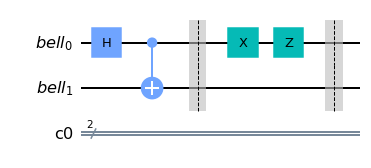

In [30]:
# We start by creating the Bell pair that Alice and Bob share

bell = QuantumRegister(2, name = 'bell') # We need two qubits
c = ClassicalRegister(2) # And two bits for the measurements 
dense = QuantumCircuit(bell,c)
dense.h(bell[0])
dense.cx(bell[0],bell[1])
dense.barrier()

# We randomly choose which bits to send

b1 = random.randint(0,1)
b2 = random.randint(0,1)

print("Alice wants to send ",b1,b2)

# And we apply the gates accordingly

if(b2==1):
    dense.x(bell[0])
if(b1==1):
    dense.z(bell[0])
    
dense.barrier()

dense.draw(output='mpl')

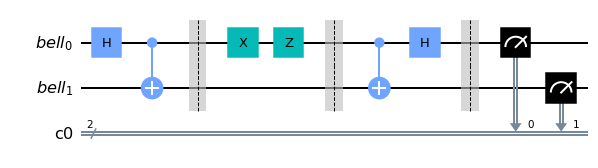

In [31]:
# Alice sends her qubit to Bob, who applies his gates and measures

dense.cx(bell[0],bell[1])
dense.h(bell[0])
dense.barrier()
dense.measure(bell,c)
dense.draw(output='mpl')

In [32]:
# Let us run the circuit

backend = Aer.get_backend('qasm_simulator')
job = execute(dense, backend, shots = 1, memory = True)
result = job.result().get_memory()

print("Bob has received ",int(result[0][1]),int(result[0][0]))

Bob has received  1 1


_________________________________________________________________________________________________________________________________________

For each pair of $(a,b) \in [(0,0),(0,1),(1,0),(1,1)]$:

* Create a quantum curcuit with two qubits: Asja's and Balvis' qubits
* Both are initially set to $|0\rangle$
* Apply h-gate (Hadamard) to Asja's qubit
* Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)

Assume that both qubits are separated from each other.
* If $a$ is 1, then apply z-gate to Asja's qubit.
* If $b$ is 1, then apply x-gate (NOT) to Asja's qubit.

Assume that Asja sends her qubit to Balvis.
* Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
* Apply h-gate (Hadamard) to Asja's qubit
* Measure both qubits and compare the results with pair $(a,b)$

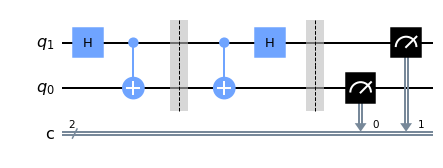

00 --> {'00': 100}


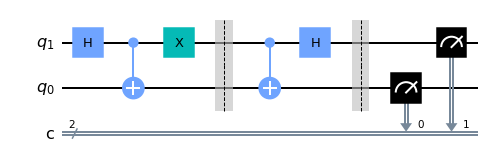

01 --> {'01': 100}


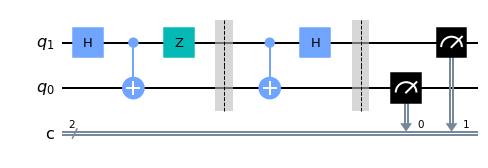

10 --> {'10': 100}


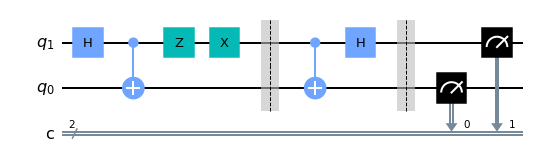

11 --> {'11': 100}


In [33]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

#
# your code is here
#
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
    q = QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])

    # apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])

    # they are separated from each other now

    # if a is 1, then apply z-gate to Asja's qubit
    if pair[0]=='1': 
        qc.z(q[1])
    
    # if b is 1, then apply x-gate (NOT) to Asja's qubit
    if pair[1]=='1': 
        qc.x(q[1])
    
    # Asja sends her qubit to Balvis
    qc.barrier()
    
    #  apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])
    
    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])
    
    # measure both qubits
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit in Qiskit's reading order
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # compare the results with pair (a,b)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"-->",counts)

_______________________________________________________________________________________________________________________________

Verify that the following modified protocol allows Balvis to send two classical bits by sending only his qubit.

For each pair of $(a,b) \in [(0,0),(0,1),(1,0),(1,1)]$ :
* Create a quantum curcuit with two qubits: Asja's and Balvis' qubits
* Both are initially set to $|0\rangle$
* Apply h-gate (Hadamard) to Asja's qubit
* Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)

Assume that both qubits are separated from each other.
* If  is 1, then apply z-gate to Balvis' qubit.
* If  is 1, then apply x-gate (NOT) to Balvis' qubit.

Assume that Balvis sends his qubit to Asja.
* Apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
* Apply h-gate (Hadamard) to Asja's qubit
* Measure both qubits and compare the results with pair $(a,b)$.

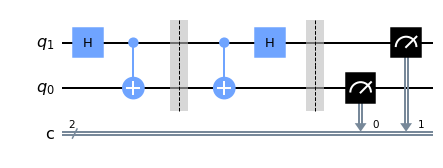

00 --> {'00': 100}


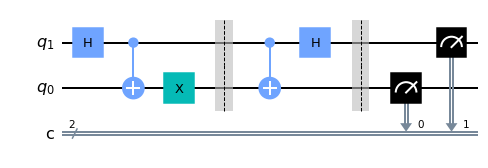

01 --> {'01': 100}


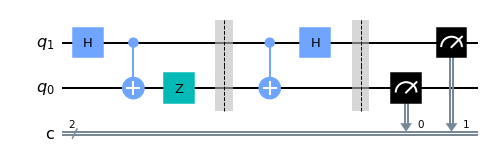

10 --> {'10': 100}


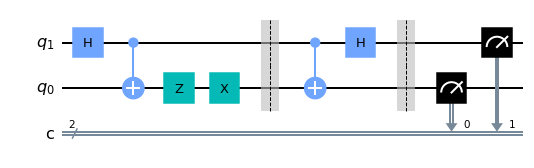

11 --> {'11': 100}


In [34]:
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

#
# your code is here
#
# import all necessary objects and methods for quantum circuits
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer

all_pairs = ['00','01','10','11']

for pair in all_pairs:

    # create a quantum curcuit with two qubits: Asja's and Balvis' qubits.
    # both are initially set to |0>.
    q = QuantumRegister(2,"q") # quantum register with 2 qubits
    c = ClassicalRegister(2,"c") # classical register with 2 bits
    qc = QuantumCircuit(q,c) # quantum circuit with quantum and classical registers

    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])

    # apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])

    # they are separated from each other now

    # if a is 1, then apply z-gate to Balvis' qubit
    if pair[0]=='1': 
        qc.z(q[0])
    
    # if b is 1, then apply x-gate (NOT) to Balvis' qubit
    if pair[1]=='1': 
        qc.x(q[0])
    
    # Balvis sends his qubit to Asja
    qc.barrier()
    
    #  apply cx-gate as CNOT(Asja's-qubit,Balvis'-qubit)
    qc.cx(q[1],q[0])
    
    # apply h-gate (Hadamard) to the Asja's qubit
    qc.h(q[1])
    
    # measure both qubits
    qc.barrier()
    qc.measure(q,c)
    
    # draw the circuit in Qiskit's reading order
    display(qc.draw(output='mpl',reverse_bits=True))
    
    # compare the results with pair (a,b)
    job = execute(qc,Aer.get_backend('qasm_simulator'),shots=100)
    counts = job.result().get_counts(qc)
    print(pair,"-->",counts)

________________________________________________________________________________________________________________________________
Create a quantum circuit with three qubits as described at the beginning of this notebook and two classical bits.

Implement the protocol given above until Asja makes the measurements (included).

* The state of $q[2]$ can be set by the rotation with a randomly picked angle.
* Remark that Balvis does not make the measurement.
At this point, read the state vector of the circuit by using "statevector_simulator".

_When a circuit having measurement is simulated by "statevectorsimulator", the simulator picks one of the outcomes, and so we see one of the states after the measurement.

Verify that the state of Balvis' qubit is in one of these:$|v_00\rangle ,| v_{01}\rangle , |v_{10}\rangle , and |v_{11}\rangle$ .

Guess the measurement outcome obtained by "statevector_simulator".

the picked angle is 32.4 degrees and 0.5654866776461628 radians
a= 0.844 b= 0.536
a*a= 0.713 b*b= 0.287


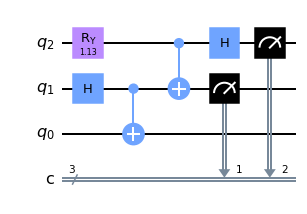

the state vector is
0.0
0.0
0.5358267949789965
0.844327925502015
0.0
-0.0
-0.0
0.0

the classical outcome is 01

the new quantum state is |01>(0.536|0>+0.844|1>)
the new quantum state is |01>(+b|0>+a|1>)


In [35]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi, cos, sin
from random import randrange

# quantum circuit with three qubits and three bits
q =  QuantumRegister(3,"q") 
c = ClassicalRegister(3,"c") 
qc = QuantumCircuit(q,c)

# rotate the first qubit by random angle
r = randrange(100)
theta = 2*pi*(r/100) # radians
print("the picked angle is",r*3.6,"degrees and",theta,"radians")
a = cos(theta)
b = sin(theta)
print("a=",round(a,3),"b=",round(b,3))
print("a*a=",round(a**2,3),"b*b=",round(b**2,3))
qc.ry(2*theta,q[2])

# creating an entanglement between q[1] and q[0]
qc.h(q[1])
qc.cx(q[1],q[0])

# CNOT operator by Asja on her qubits where q[2] is the control qubit 
qc.cx(q[2],q[1])

# Hadamard operator by Asja on q[2]
qc.h(q[2])

# the measurement done by Asja
qc.measure(q[2],c[2])
qc.measure(q[1],c[1])

# draw thw circuit
display(qc.draw(output='mpl',reverse_bits=True))

# read the state vector
job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
current_quantum_state=job.result().get_statevector(qc)
print("the state vector is")
for i in range(len(current_quantum_state)):
    print(current_quantum_state[i].real)
print()

classical_outcomes = ['00','01','10','11']

for i in range(4):
    if (current_quantum_state[2*i].real != 0) or (current_quantum_state[2*i+1].real != 0):
        print("the classical outcome is",classical_outcomes[i])
        classical_outcome = classical_outcomes[i]
        balvis_state = [ current_quantum_state[2*i].real,current_quantum_state[2*i+1].real ]
print()
        
readable_quantum_state = "|"+classical_outcome+">"
readable_quantum_state += "("+str(round(balvis_state[0],3))+"|0>+"+str(round(balvis_state[1],3))+"|1>)"
print("the new quantum state is",readable_quantum_state)


all_states = ['000','001','010','011','100','101','110','111']

        
balvis_state_str = "|"+classical_outcome+">("
for i in range(len(current_quantum_state)):
    if abs(current_quantum_state[i].real-a)<0.000001: 
        balvis_state_str += "+a|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real+a)<0.000001:
        balvis_state_str += "-a|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real-b)<0.000001: 
        balvis_state_str += "+b|"+ all_states[i][2]+">"
    elif abs(current_quantum_state[i].real+b)<0.000001: 
        balvis_state_str += "-b|"+ all_states[i][2]+">"
balvis_state_str += ")"        
print("the new quantum state is",balvis_state_str)

________________________________________________________________________________________________________________________________
Implement the protocol above by including the post-processing part done by Balvis, i.e., the measurement results by Asja are sent to Balvis and then he may apply  or  gates depending on the measurement results.

We use the classically controlled quantum operators.

Since we do not make measurement on $q[0]$, we define only 2 classical bits, each of which can also be defined separated.
$$q = QuantumRegister(3) $$
$$c2 = ClassicalRegister(1,'c2') $$
$$c1 = ClassicalRegister(1,'c1') $$
$$qc = QuantumCircuit(q,c1,c2) $$
$$... $$
$$qc.measure(q[1],c1) $$
$$... \\ $$
$ qc.x(q[0]).c \ if(c1,1) \rightarrow $x-gate is applied to $q[0]$  if the classical bit c1 is equal to 1 

Read the state vector and verify that Balvi's state is $\overrightarrow{ab}$  after the post-processing.

the picked angle is 237.6 degrees and 4.1469023027385274 radians
a= -0.5358 b= -0.8443


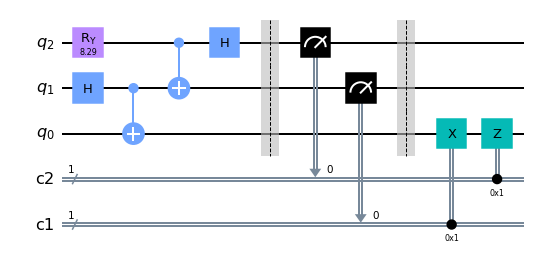

the state vector is
-0.5358
-0.8443
-0.0
-0.0
-0.0
0.0
0.0
-0.0

the classical outcome is 00


In [36]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from math import pi, cos, sin
from random import randrange

# quantum circuit with three qubits and two bits
q =  QuantumRegister(3,"q") 
c1 = ClassicalRegister(1,"c1") 
c2 = ClassicalRegister(1,"c2") 
qc = QuantumCircuit(q,c1,c2)

# rotate the first qubit by random angle
r = randrange(100)
theta = 2*pi*(r/100) # radians
print("the picked angle is",r*3.6,"degrees and",theta,"radians")
a = cos(theta)
b = sin(theta)
print("a=",round(a,4),"b=",round(b,4))
qc.ry(2*theta,q[2])

# creating an entanglement between q[1] and q[0]
qc.h(q[1])
qc.cx(q[1],q[0])

# CNOT operator by Asja on her qubits where q[2] is the control qubit 
qc.cx(q[2],q[1])

# Hadamard operator by Asja on q[2]
qc.h(q[2])

qc.barrier()

# the measurement done by Asja
qc.measure(q[2],c2)
qc.measure(q[1],c1)

qc.barrier()

# post-processing done by Balvis
qc.x(q[0]).c_if(c1,1)
qc.z(q[0]).c_if(c2,1)

# draw the circuit
display(qc.draw(output='mpl',reverse_bits=True))

# read the state vector
job = execute(qc,Aer.get_backend('statevector_simulator'),optimization_level=0,shots=1)
current_quantum_state=job.result().get_statevector(qc)
print("the state vector is")
for i in range(len(current_quantum_state)):
    print(round(current_quantum_state[i].real,4))
print()

classical_outcomes = ['00','01','10','11']

for i in range(4):
    if (current_quantum_state[2*i].real != 0) or (current_quantum_state[2*i+1].real != 0):
        print("the classical outcome is",classical_outcomes[i])